In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import networkx as nx

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Feature Engineering

In [4]:
# One hot encoded the gender column
df_ohe = pd.get_dummies(df)

In [5]:
df_ohe

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [6]:
# Scale the numerical data
scaler = StandardScaler()
df_preprocessed = scaler.fit_transform(df_ohe)

### Social Detection

In [7]:
df_preprocessed = pd.DataFrame(df_preprocessed, columns= df_ohe.columns)

In [8]:
# Make a correlation matrix for each row
corr_matrix = df_preprocessed.T.corr()

In [9]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.883692,0.145976,0.284264,0.177303,0.281980,0.019724,0.273882,0.394361,0.226282,...,-0.747364,-0.713096,-0.121402,-0.698825,-0.806739,-0.717309,-0.825616,-0.042087,-0.179006,-0.056008
1,0.883692,1.000000,-0.040114,0.525722,0.221433,0.520492,-0.168299,0.569458,0.149214,0.459415,...,-0.869352,-0.552815,-0.399101,-0.419932,-0.954497,-0.524818,-0.919640,-0.024357,-0.394691,-0.002514
2,0.145976,-0.040114,1.000000,0.528039,0.838489,0.534958,0.911771,0.394106,0.079161,0.558198,...,0.060407,-0.139402,-0.397597,-0.292782,-0.022538,-0.249622,-0.084749,-0.735245,-0.457185,-0.720422
3,0.284264,0.525722,0.528039,1.000000,0.839935,0.999483,0.400477,0.988160,-0.252293,0.985768,...,-0.463846,-0.080758,-0.895358,0.021904,-0.605073,-0.112176,-0.561256,-0.583252,-0.848446,-0.508448
4,0.177303,0.221433,0.838489,0.839935,1.000000,0.835147,0.831604,0.752553,0.091831,0.893573,...,-0.317985,-0.261557,-0.830070,-0.255807,-0.369517,-0.325855,-0.401363,-0.893940,-0.851057,-0.849508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.717309,-0.524818,-0.249622,-0.112176,-0.325855,-0.092812,-0.407352,-0.052417,-0.880318,-0.176105,...,0.743996,0.980469,0.249750,0.977878,0.635069,1.000000,0.740421,0.494355,0.387782,0.545861
196,-0.825616,-0.919640,-0.084749,-0.561256,-0.401363,-0.547071,-0.080989,-0.576404,-0.395366,-0.552795,...,0.957706,0.740406,0.575335,0.613542,0.988257,0.740421,1.000000,0.344214,0.625718,0.340881
197,-0.042087,-0.024357,-0.735245,-0.583252,-0.893940,-0.568881,-0.891994,-0.483729,-0.393472,-0.694844,...,0.306179,0.420402,0.752151,0.429723,0.261274,0.494355,0.344214,1.000000,0.833936,0.993837
198,-0.179006,-0.394691,-0.457185,-0.848446,-0.851057,-0.833317,-0.539774,-0.822750,-0.137816,-0.912639,...,0.586505,0.348928,0.978468,0.229132,0.610692,0.387782,0.625718,0.833936,1.000000,0.794807


In [10]:
# Fill the diagonal with 0 and effectively returning only the lower triangle (including the diagonal)
np.fill_diagonal(corr_matrix.values,0)
corr_matrix = np.tril(corr_matrix)
corr_matrix = pd.DataFrame(corr_matrix)

In [11]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.883692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.145976,-0.040114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.284264,0.525722,0.528039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.177303,0.221433,0.838489,0.839935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.717309,-0.524818,-0.249622,-0.112176,-0.325855,-0.092812,-0.407352,-0.052417,-0.880318,-0.176105,...,0.743996,0.980469,0.249750,0.977878,0.635069,0.000000,0.000000,0.000000,0.000000,0.0
196,-0.825616,-0.919640,-0.084749,-0.561256,-0.401363,-0.547071,-0.080989,-0.576404,-0.395366,-0.552795,...,0.957706,0.740406,0.575335,0.613542,0.988257,0.740421,0.000000,0.000000,0.000000,0.0
197,-0.042087,-0.024357,-0.735245,-0.583252,-0.893940,-0.568881,-0.891994,-0.483729,-0.393472,-0.694844,...,0.306179,0.420402,0.752151,0.429723,0.261274,0.494355,0.344214,0.000000,0.000000,0.0
198,-0.179006,-0.394691,-0.457185,-0.848446,-0.851057,-0.833317,-0.539774,-0.822750,-0.137816,-0.912639,...,0.586505,0.348928,0.978468,0.229132,0.610692,0.387782,0.625718,0.833936,0.000000,0.0


In [12]:
# Remove the correlation value that is below 0.8
threshold = 0.8
corr_matrix = corr_matrix[corr_matrix > threshold]

We aim to construct a graph representing the relationship between customers, where two customers are connected by an edge if their correlation value is equal to or greater than 0.8.

In [13]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.883692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.838489,0.839935,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.980469,NaN,0.977878,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.957706,NaN,NaN,NaN,0.988257,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.978468,NaN,NaN,NaN,NaN,0.833936,NaN,NaN


In [14]:
# Make a dataframe for customer that have relation with other customer
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['Customer1', 'Customer2', 'Correlation']

In [15]:
corr_df

,Customer1,Customer2,Correlation
0,1,0,0.883692
1,4,2,0.838489
2,4,3,0.839935
3,5,3,0.999483
4,5,4,0.835147
...,...,...,...
2044,199,177,0.904935
2045,199,179,0.882720
2046,199,185,0.899733
2047,199,187,0.953488


In [16]:
# Create a graph object
G = nx.Graph()

for _, row in corr_df.iterrows():
    G.add_edge(row['Customer1'], row['Customer2'])

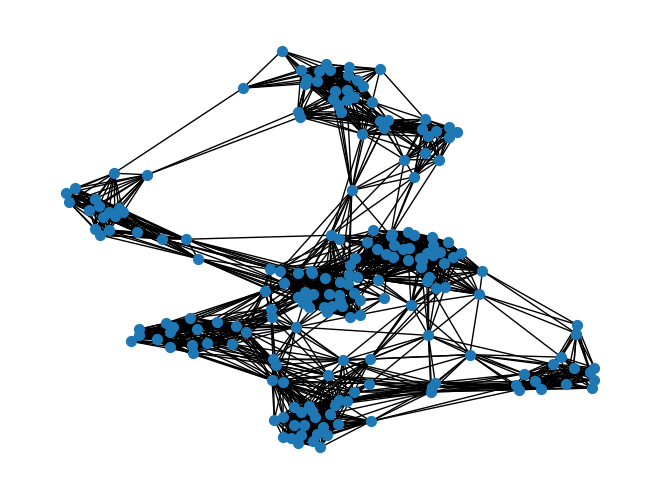

In [17]:
# Draw the graph with edge weights as labels
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, node_size=50)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [18]:
node_degree = pd.DataFrame(nx.degree(G))
node_degree.columns = ['CustomerID','Degree']
leader_node = node_degree.sort_values(by='Degree',ascending=False).head(7)

In [19]:
#import networkx as nx
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
# Find the best algorithm to use and the number of cluster

n_clusters_range = range(2, 10)

best_score = -1
best_labels = None
best_algorithm = None

for algorithm in [KMeans]:
    for n_clusters in n_clusters_range:
        clustering_model = algorithm(n_clusters=n_clusters,n_init=10)
        clustering_labels = clustering_model.fit_predict(nx.to_numpy_array(G), 'weight')
        score = silhouette_score(nx.to_numpy_array(G), clustering_labels, metric='euclidean')
        if score > best_score:
            best_score = score
            best_labels = clustering_labels
            best_algorithm = algorithm

print(f"Best algorithm: {best_algorithm.__name__}")
print(f"Best number of clusters: {best_labels.max() + 1}")
print(f"Best Silhouette score: {best_score:.3f}")


Best algorithm: KMeans
Best number of clusters: 9
Best Silhouette score: 0.378


In [20]:
# Convert networkx graph to numpy matrix
adjacency_matrix = nx.to_numpy_array(G)

# Set number of clusters
n_clusters = 9

# Create instance of KMeans algorithm
kmeans = KMeans(n_clusters=n_clusters,n_init=10)

# Perform clustering and obtain labels
clustering_labels = kmeans.fit_predict(adjacency_matrix)

# Print the clustering labels
print(clustering_labels)

[7 7 3 3 3 3 2 3 3 6 6 3 2 3 6 7 2 7 6 3 7 7 2 7 2 7 2 7 2 3 6 3 6 7 2 3 2
 3 2 3 2 7 6 3 2 3 2 3 3 3 2 7 3 6 2 6 2 6 3 6 6 7 2 2 6 7 2 2 7 3 6 2 2 2
 6 7 2 6 8 2 6 7 6 2 8 6 2 8 3 2 2 5 6 2 8 5 2 8 6 5 8 2 6 5 6 8 2 6 6 6 6
 8 8 5 8 8 2 2 2 2 5 4 8 5 8 0 1 5 1 5 1 5 8 0 0 4 5 1 1 0 4 5 8 0 1 5 1 0
 4 5 1 5 4 0 4 0 1 0 1 0 4 0 1 0 1 0 1 0 4 5 1 5 1 5 4 0 1 5 1 5 4 0 1 0 4
 5 4 5 4 0 4 0 1 0 4 0 4 5 1 5]


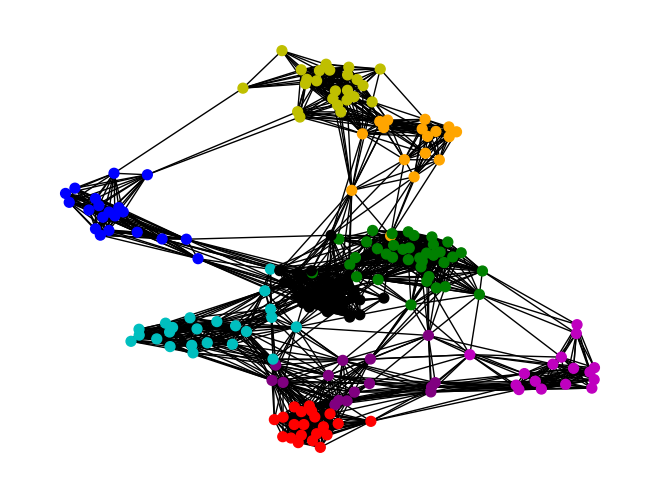

In [21]:
# Draw the graph with nodes colored based on clustering labels
# pos = nx.spring_layout(G)
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple']
color_map = [colors[label] for label in clustering_labels]
nx.draw(G, pos, node_color=color_map, node_size=50)
plt.show()


In [22]:
node_labels = dict(zip(G.nodes(), clustering_labels))
print(node_labels)

{1.0: 7, 0.0: 7, 4.0: 3, 2.0: 3, 3.0: 3, 5.0: 3, 6.0: 2, 7.0: 3, 9.0: 3, 10.0: 6, 8.0: 6, 11.0: 3, 12.0: 2, 13.0: 3, 14.0: 6, 15.0: 7, 16.0: 2, 17.0: 7, 18.0: 6, 19.0: 3, 20.0: 7, 21.0: 7, 22.0: 2, 23.0: 7, 24.0: 2, 25.0: 7, 26.0: 2, 27.0: 7, 28.0: 2, 29.0: 3, 30.0: 6, 31.0: 3, 32.0: 6, 33.0: 7, 34.0: 2, 35.0: 3, 36.0: 2, 37.0: 3, 38.0: 2, 39.0: 3, 40.0: 2, 41.0: 7, 42.0: 6, 43.0: 3, 44.0: 2, 45.0: 3, 46.0: 2, 47.0: 3, 48.0: 3, 49.0: 3, 50.0: 2, 51.0: 7, 52.0: 3, 53.0: 6, 54.0: 2, 55.0: 6, 56.0: 2, 57.0: 6, 58.0: 3, 59.0: 6, 60.0: 6, 61.0: 7, 62.0: 2, 63.0: 2, 64.0: 6, 65.0: 7, 66.0: 2, 67.0: 2, 68.0: 7, 69.0: 3, 70.0: 6, 71.0: 2, 72.0: 2, 73.0: 2, 74.0: 6, 75.0: 7, 76.0: 2, 77.0: 6, 78.0: 8, 79.0: 2, 80.0: 6, 81.0: 7, 82.0: 6, 83.0: 2, 84.0: 8, 85.0: 6, 86.0: 2, 87.0: 8, 88.0: 3, 89.0: 2, 90.0: 2, 91.0: 5, 92.0: 6, 93.0: 2, 94.0: 8, 95.0: 5, 96.0: 2, 97.0: 8, 98.0: 6, 99.0: 5, 100.0: 8, 101.0: 2, 102.0: 6, 103.0: 5, 104.0: 6, 105.0: 8, 106.0: 2, 107.0: 6, 108.0: 6, 109.0: 6, 110.0: 6,

In [23]:
# Make a new columns labels
df_ohe['Labels'] = df_ohe.index.map(node_labels)

The code adds a new column called "Labels" to a dataframe, which indicates the cluster to which each customer is assigned. The cluster assignment is based on the output of a clustering algorithm applied to the customer data. The labels column contains integer values that correspond to the cluster number of each customer.

In [24]:
from collections import defaultdict

# Create a dictionary to store the nodes with the highest degree in each cluster
cluster_centers = defaultdict(int)

# Loop over all nodes and store the node with the highest degree in its cluster
for node, cluster_label in enumerate(clustering_labels):
    if G.degree(node) > G.degree(cluster_centers[cluster_label]):
        cluster_centers[cluster_label] = node

# Print the cluster centers with their corresponding cluster label and degree
for cluster_label, center_node in cluster_centers.items():
    print(f"Cluster {cluster_label}: Node {center_node} with degree {G.degree(center_node)}")


Cluster 7: Node 68 with degree 23
Cluster 3: Node 47 with degree 26
Cluster 2: Node 71 with degree 36
Cluster 6: Node 55 with degree 29
Cluster 8: Node 84 with degree 28
Cluster 5: Node 103 with degree 24
Cluster 4: Node 135 with degree 23
Cluster 0: Node 133 with degree 31
Cluster 1: Node 137 with degree 25


In [25]:
# Make a new column Leaders to assign the most influencial customer (Leaders)
df_ohe['Leaders'] = df_ohe['Labels'].map(cluster_centers)

In [26]:
df_ohe

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Labels,Leaders
0,1,19,15,39,0,1,7,68
1,2,21,15,81,0,1,7,68
2,3,20,16,6,1,0,3,47
3,4,23,16,77,1,0,3,47
4,5,31,17,40,1,0,3,47
...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0,133
196,197,45,126,28,1,0,4,135
197,198,32,126,74,0,1,5,103
198,199,32,137,18,0,1,1,137


In [27]:
df_ohe.groupby(['Labels','Leaders']).mean()

,,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
Labels,Leaders,,,,,,
0,133,163.333333,32.190476,86.047619,81.666667,1.0,0.0
1,137,159.500000,39.500000,85.150000,14.050000,0.0,1.0
2,71,65.189189,50.837838,46.027027,40.567568,1.0,0.0
3,47,33.304348,27.130435,31.347826,65.086957,1.0,0.0
4,135,167.937500,44.187500,90.750000,22.750000,1.0,0.0
5,103,146.458333,30.541667,80.875000,74.458333,0.0,1.0
6,55,67.666667,57.333333,47.000000,40.222222,0.0,1.0
7,68,37.705882,25.411765,33.117647,65.588235,0.0,1.0
8,84,108.800000,25.266667,63.533333,46.266667,1.0,0.0


In [28]:
df_ohe.groupby('Labels').size()

Labels
0    21
1    20
2    37
3    23
4    16
5    24
6    27
7    17
8    15
dtype: int64

### Conclusion

Based on the social network graph analysis, we can group the customers into clusters based on their similarities. Within each cluster, we can identify the most influential customer (Leaders), who we can directly target to reach the rest of the customers in that cluster. Additionally, each customer has unique characteristics, allowing us to customize marketing strategies to suit their specific needs.

Based on the cluster analysis, we can identify the most influential customer in each cluster to target our marketing campaigns. For example, in cluster 0, we can target customer 103, who has a high spending score and is likely to have a significant influence on other customers in the cluster. In cluster 1, we can target customer 135, who has a high annual income and spending score.

We can also customize our marketing campaigns based on the characteristics of each cluster. For instance, customers in cluster 2 have a relatively low annual income and spending score, so we can focus on offering them products or services that are affordable and practical. Customers in cluster 4 have a high spending score but a low annual income, so we can offer them discounts or promotions to entice them to make purchases.

Overall, by leveraging the insights gained from the cluster analysis, we can develop more effective marketing strategies that are tailored to the unique characteristics and preferences of each customer segment.